In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display, Markdown , Math 

sns.set()


<h1> Desiosion Tree Clasifier </h1>


Formally the decision tree is a graphical representation of all possible solutions to a decision.
These days tree-based algorithms are most commonly used in the case in supervised learning due to it is ease for intepretation.We can use DTree for classification and regression tasks however most of the time it is used for classification problem.Decision trees are assigned to the information based learning algorithms which use different measures of information gain for learning.The main idea of deciosion tree is to find those descriptive features wich contain the most "information" regarding to the target feature and split the dataset along the values of these features such that the target feature values  for resulting sub datasets are as pure as possible.The descriptive feature which leaves the target feature most purely is said to be the most informative one.This process of finding the "most informative" feature is done until we accomplish a stopping criteria where we then finally end up in so-called <mark>leaf nodes</mark>.

<h1> Entropy </h1>

<img src='https://miro.medium.com/max/1050/1*i7cfMirN2WpaJhYZa1a1Mg.png'/>

The entropy appeared in the thermodynamic field in the works of  Rudolf Clausius over the temperature of the gas. In ML the entropy plays an important row because it is a measure of chaos, disorder, or uncertainty of the system.
The above graphics represent the two gasses initially they have a low entropy because they are cleanly separable, after some time, however, the gasses intermingle and the system's entropy increased. 

 The entropy of a dataset is used to measure the impurity of a dataset and we will use this kind of informativeness measure in our calculations.

There are also other types of measures which can be used to calculate the information gain. The most prominent ones are the: Gini Index, Chi-Square, Information gain ratio, Variance. The term entropy (in information theory) goes back to Claude E. Shannon. The idea behind the entropy is, in simplified terms, the following: Imagine you have a lottery wheel which includes 100 green balls. The set of balls within the lottery wheel can be said to be totally pure because only green balls are included. To express this in the terminology of entropy, this set of balls has a entropy of 0 (we can also say zero impurity). Consider now, 30 of these balls are replaced by red and 20 by blue balls.



Shannon's entropy model uses the logarithm function () to measure the entropy and therewith the impurity of a dataset since the higher the probability of getting a specific result == P(x) (randomly drawing a green ball), the closer approaches the binary logarithm 1.

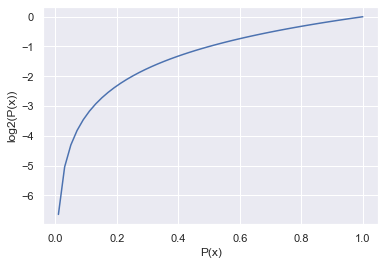

s


In [4]:
fig=plt.figure()
ax=fig.add_subplot(111)

ax.plot(np.linspace(0.01,1),np.log2(np.linspace(0.01,1)))
ax.set_xlabel("P(x)")
ax.set_ylabel("log2(P(x))")

plt.show()
print('s')

Once a dataset contains more than one "type" of elements specifically more than one target feature value, the impurity will be greater than zero. Therewith also the entropy of the dataset will be greater than zero. Hence it is useful to sum up the entropies of each possible target feature value and weight it by the probability that we achieve these values assuming we would randomly draw values from the target feature value space (What is the probability to draw a green ball just by chance? Exactly, 0.5 and therewith we have to weight the entropy calculated for the green balls with 0.5). This finally leads to the formal definition of Shannon's entropy which serves as the baseline for the information gain calculation:

$$H(x) = - \sum_{k=0}^m p_k\log_2{p_k} $$
$k = 0,...,m$ target variable

In [4]:
iris = pd.read_csv("../../../resources/data/IRIS.csv")  
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
iris['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

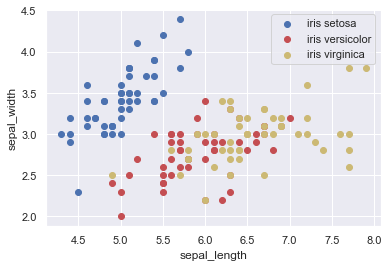

In [75]:
#iris.loc[iris['species' == 'd']]
iris_setosa=iris[iris['species'] == 'Iris-setosa']
iris_versicolor=iris[iris['species'] == 'Iris-versicolor'] 
iris_virginica=iris[iris['species'] == 'Iris-virginica']
def plot_data():
    plt.scatter(iris_setosa['sepal_length'].to_numpy(),iris_setosa['sepal_width'].to_numpy(),color='b',label='iris setosa')
    plt.scatter(iris_versicolor['sepal_length'].to_numpy(),iris_versicolor['sepal_width'].to_numpy(),color='r',label='iris versicolor')
    plt.scatter(iris_virginica['sepal_length'].to_numpy(),iris_virginica['sepal_width'].to_numpy(),color='y',label='iris virginica')
    plt.ylabel('sepal_width')
    plt.xlabel('sepal_length')
    plt.legend()
#plt.gca().set_aspect(60/30)
plot_data()

In [7]:
def prbability(Y):
    pass

def entropy(X,Y):
    pass
    

If we pick up a random iris the  probabilyty to be the iris setosa is : 

In [61]:
probavility_setosa = iris[iris['species'] == 'Iris-setosa'].shape[0]/iris.shape[0]
print('p(iris setosa)= p(size(iris)/size(iris-setosa))= {}%'.format( probavility_setosa))

p(iris setosa)= p(size(iris)/size(iris-setosa))= 0.3333333333333333%


In [67]:
iris[iris['sepal_width'] > 3.5]

,sepal_length,sepal_width,petal_length,petal_width,species
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
10,5.4,3.7,1.5,0.2,Iris-setosa
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
16,5.4,3.9,1.3,0.4,Iris-setosa
18,5.7,3.8,1.7,0.3,Iris-setosa
19,5.1,3.8,1.5,0.3,Iris-setosa
21,5.1,3.7,1.5,0.4,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa


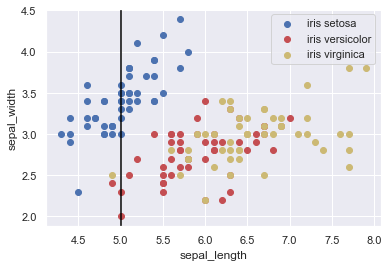

In [77]:
plot_data()
plt.axvline(x=5,color='black')

if we get the left side of data sepatated by black line then the probabily to get the 'iris-setosa' is  

In [102]:
iris_s = iris[(iris['sepal_width'] > 3.5) & (iris['species'] == 'Iris-setosa')].shape[0]
iris = iris[(iris['sepal_width'] > 3.5)].shape[0]
print('p(iris setosa)= p(size(iris)/size(iris-setosa))= {}%'.format( iris_s/iris))

p(iris setosa)= p(size(iris)/size(iris-setosa))= 0.8333333333333334%


In [97]:
#iris.loc[iris['sepal_width'] > 3.5 and iris['sepal_width'] <5]



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
#probavility_setosa = iris[ (iris['species'] == 'Iris-setosa') & (iris[iris['sepal_width'] > 3.5]) ].shape[0]/iris.shape[0]
#print('p(iris setosa)= p(size(iris)/size(iris-setosa))= {}%'.format( probavility_setosa))

In [11]:
data = pd.read_csv("../../../resources/data/500_Person_Gender_Height_Weight_Index.csv")  
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


people with an index of 4 or 5 are obese, so we could create a variable that reflects this:

In [16]:
data['obese'] =  (data.Index > 4) .astype('int')

In [20]:
data.drop('Index', axis = 1, inplace = True)
data

,Gender,Height,Weight,obese
0,Male,174,96,0
1,Male,189,87,0
2,Female,185,110,0
3,Female,195,104,0
4,Male,149,61,0
...,...,...,...,...
495,Female,150,153,1
496,Female,184,121,0
497,Female,141,136,1
498,Male,150,95,1


In that case , a decision tree would tell us different rules, such as that if the person’s weight is greater than 100kg, it is most likely that the person is obese. However, that cut will not be precise: there will be people who weigh 100kg or more who are not obese. Thus, the decision tree continues to create more branches that generate new conditions to “refine” our predictions.

In [27]:
data.loc[(data['Weight']>=100) & (data['obese']==0),:].shape[0]

102

<h2>Calculate impurity using the Gini index</h2>

The Gini index is the most widely used cost function in decision trees. This index calculates the amount of probability that a specific characteristic will be classified incorrectly when it is randomly selected.

This is an index that ranges from 0 (a pure cut) to 0.5 (a completely pure cut that divides the data equally). The Gini index is calculated as follows:

$$ Gini  = 1 - \sum_{i=1}^n(P_i)^2$$

In [40]:
y = data['obese']
type(y)
probability = y.value_counts()/y.shape[0]
gini = 1 - np.sum(probability**2)
gini

0.478368

In [52]:
def gini_impurity(y):
    '''
    Given a Pandas Series, it calculates the Gini Impurity. 
    y: variable with which calculate Gini Impurity.
    '''
    if isinstance(y,pd.Series):
        print(y.value_counts())
        p = y.value_counts()/y.shape[0]
        gini = 1-np.sum(p**2)
        return(gini)
    
    else :
        raise('object must be a Pandas Series')

        
gini_impurity(data.Gender)        

Female    255
Male      245
Name: Gender, dtype: int64


0.4998

entropy
$$ E(S) = \sum_{i=1}^c - p_i\log_2p_i$$

In [64]:
def entropy(y):
    """
    Given a Pandas Series, it calculates the Entropy
    y: variable with wich calculate Entropy
    """
    if isinstance(y, pd.Series):
        p = y.value_counts()/y.shape[0]
        entropy = np.sum(-p*np.log2(p)+1e-9)
        return(entropy)
    else :
        raise("Object y must to be a Pandas Series")
        
    

In [65]:
entropy(data['obese'])

0.968562602558214

In [69]:
entropy(data['obese'][data['Weight']>=140])

0.3834641343087979

As we have seen, cuts are compared by impurity. Therefore, we are interested in comparing those cuts that generate less impurity. For this, Information Gain is used. This metric indicates the improvement when making different partitions and is usually used with entropy (it could also be used with the Gini index, although in that case it would not be called Informaiton Gain).

The calculation of the Information Gain will depend on whether it is a classification or regression decision tree. There would be two options:

$$ InformationGain_{clasification} = E(d) - \sum\frac{|s|}{|d|}E(s)$$

$$ InformationGain_{regression} = Var(d) - \sum\frac{|s|}{|d|}Var(s)$$

So the Information Gain will look like this:

In [75]:
a = mask = data['Gender'] == 'Male'
a

0       True
1       True
2      False
3      False
4       True
       ...  
495    False
496    False
497    False
498     True
499     True
Name: Gender, Length: 500, dtype: bool

In [76]:
b = mask.shape[0] - a

0

In [106]:
def variance(y):
  '''
  Function to help calculate the variance avoiding nan.
  y: variable to calculate variance to. It should be a Pandas Series.
  '''
  if(len(y) == 1):
    return 0
  else:
    return y.var()

def information_gain(y, mask, func=entropy):
  '''
  It returns the Information Gain of a variable given a loss function.
  y: target variable.
  mask: split choice.
  func: function to be used to calculate Information Gain in case os classification.
  '''
  
  a = sum(mask)
  b = mask.shape[0] - a
  
  if(a == 0 or b ==0): 
    ig = 0
  
  else:
    if y.dtypes != 'O':
      ig = variance(y) - (a/(a+b)* variance(y[mask])) - (b/(a+b)*variance(y[-mask]))
    else:
      ig = func(y)-a/(a+b)*func(y[mask])-b/(a+b)*func(y[-mask])
  
  return ig

In [111]:
def max_information_gain_split(x, y, func=entropy):
    pass

x,y = data['Weight'], data['obese']

split_value = []
ig = [] 

numeric_variable = True if x.dtypes != 'O' else False # check the type of column

#Create options according to variable type
if numeric_variable:
    options = x.sort_values().unique()[1:]
else : 
    pass
    

options
for val in options:
    mask =   x < val if numeric_variable else x.isin(val)
    val_ig = information_gain(y, mask, func=entropy)
    print(mask)
    print(val_ig)

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Weight, Length: 500, dtype: bool
0.0028714899186155496
0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Weight, Length: 500, dtype: bool
0.004181845171828014
0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Weight, Length: 500, dtype: bool
0.005850436840420192
0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Weight, Length: 500, dtype: bool
0.006188326653310289
0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Name: Weight, Length: 500, dtype: bool
0.008

<h2> How to choose the cuts for our decision tree </h2>

<h2> References </h2>
[1] <a href = 'https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/'> How To Implement The Decision Tree Algorithm From Scratch In Python </a> <br> <br>
[2] <a href = 'analyticsvidhya.com/blog/2020/06/4-ways-split-decision-tree/'> 4 Simple Ways to Split a Decision Tree in Machine Learning </a> <br>
[3] <a href = 'https://zerowithdot.com/decision-tree/'>Decision Tree - Implemented from scratch </a> <br>
[4] <a href = 'https://python-course.eu/machine-learning/decision-trees-in-python.php'>Decision Trees in Python <a><br>
[5] <a href='https://anderfernandez.com/en/blog/code-decision-tree-python-from-scratch/'>How to program decision tree in oython from 0 </a>
    